In [1]:
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt
import pickle

import sys
sys.path.insert(0,'./src/')

from utils import *
from pipe_system import PipeSystem
from abstract_pipe import *
from pipe_system.let_index import LetIndex
from multiply_connected_pipe import *
from fmm2dpy import cfmm2d

In [2]:
with open('./exp1/pipes_and_shifts.pickle','rb') as f:
    pipes, shifts = pickle.load(f)

In [3]:
bdr_pipe = BoundaryPipe([BoundaryLet(-5,0,0,1,-1),BoundaryLet(31,0,np.pi,1,1)])
real_pipes = [RealPipe(p,shift_x=shift[0],shift_y=shift[1]) for p,shift in zip(pipes,shifts)]
ps = PipeSystem(real_pipes,bdr_pipe)

In [4]:
xs, ys, u_field, v_field, p_field, o_field = ps.plotting_data()

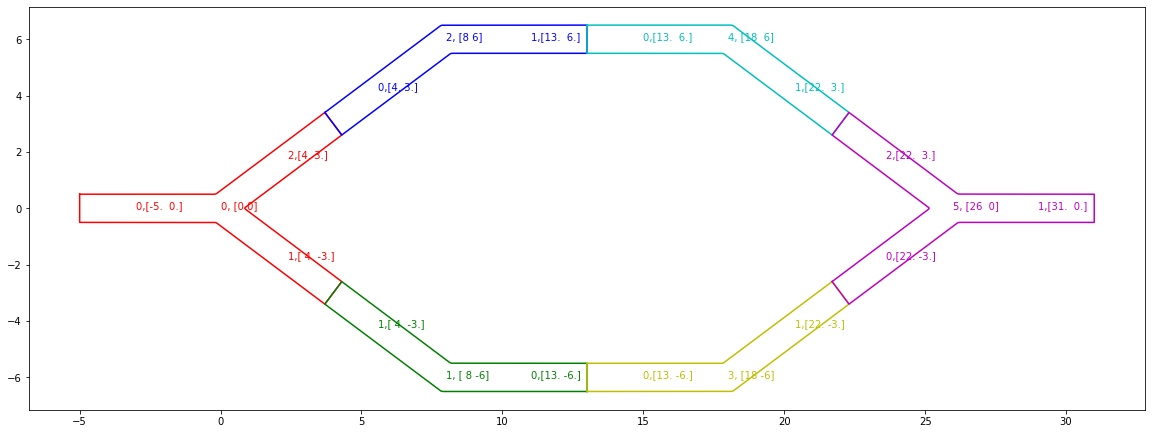

In [5]:
color = ['r','g','b','y','c','m','k']

fig,ax = plt.subplots(figsize=(20,10))
ax.set_aspect('equal')

for a,i,j,c in zip(range(10),pipes,shifts,color):
    ax.plot(*(i.exterior_boundary.plyg_bdr() + j).T,c=c)
    for k,let in enumerate(i.lets):
        ax.text(*(0.6*let.matching_pt + j),f'{k},{let.matching_pt + j}',color=c)
    ax.text(*j,f'{a}, {j}',color=c)

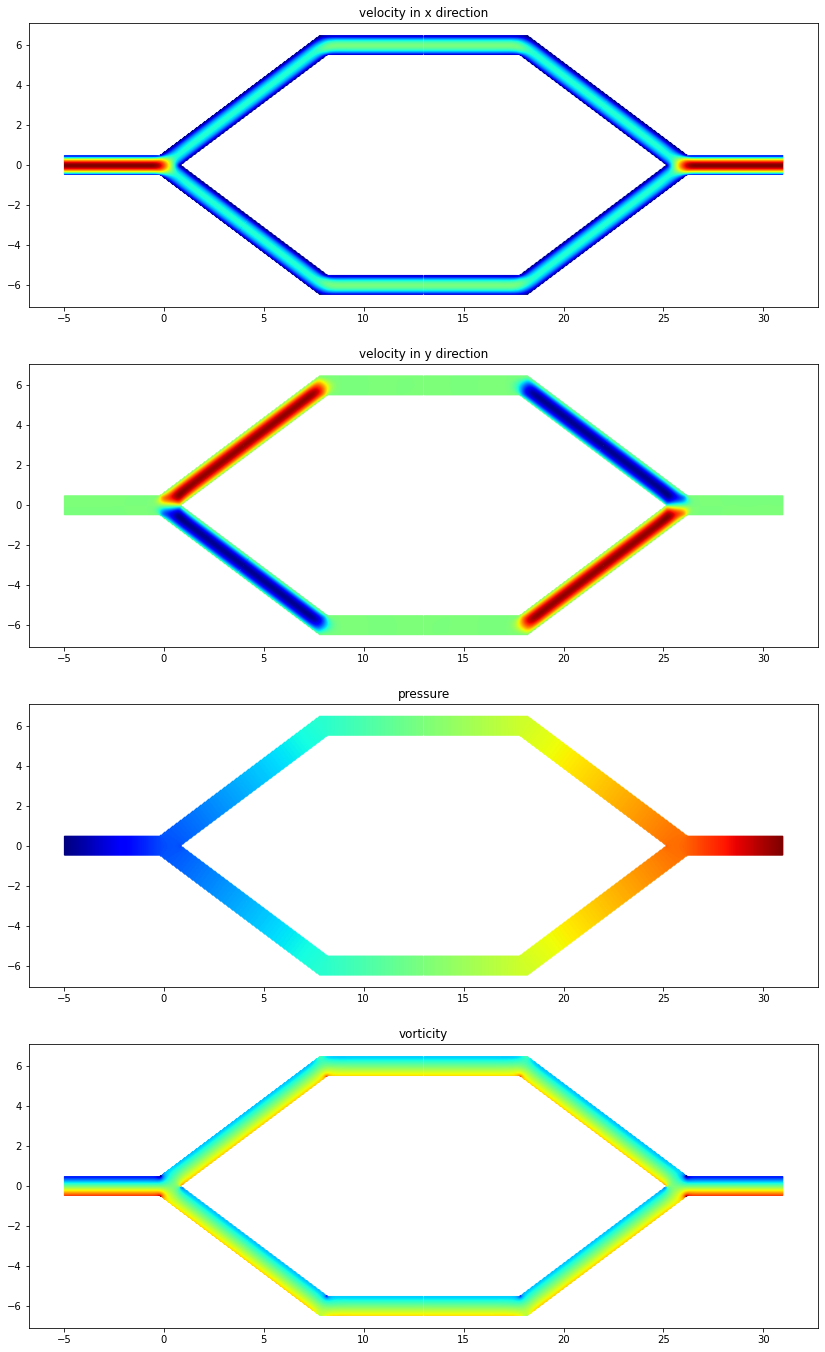

In [6]:
fig,axes = plt.subplots(4,1,figsize=(20,24))

for ax, field, title, in zip(axes, [u_field,v_field,p_field,o_field], ['velocity in x direction','velocity in y direction','pressure','vorticity']):
    ax.set_aspect('equal')
    ax.scatter(xs,ys,c=field,s=1,cmap='jet')
    ax.set_title(title)

In [7]:
with open('./exp2/global_pipe_fmm.pickle','rb') as f:
    pipe = pickle.load(f)
omega = pipe.omegas[0]
p_global, o_global = pipe.pressure_and_vorticity(xs,ys,omega)
u_global, v_global = (pipe.velocity(xs,ys,omega)).T

/Users/haiy/pkg/fmm2d/python/fmm2dpy/fmm2d.py:894: ComplexWarning: Casting complex values to real discards the imaginary part
  out.pottarg,out.gradtarg,out.ier = lfmm.cfmm2d_t_d_g(eps,sources,dipstr,targets)


Text(0.5, 0.98, 'log10 of abs diff between global solver and connected local solver\n both are corrected, and the n_pts = 21k for the global solver. ')

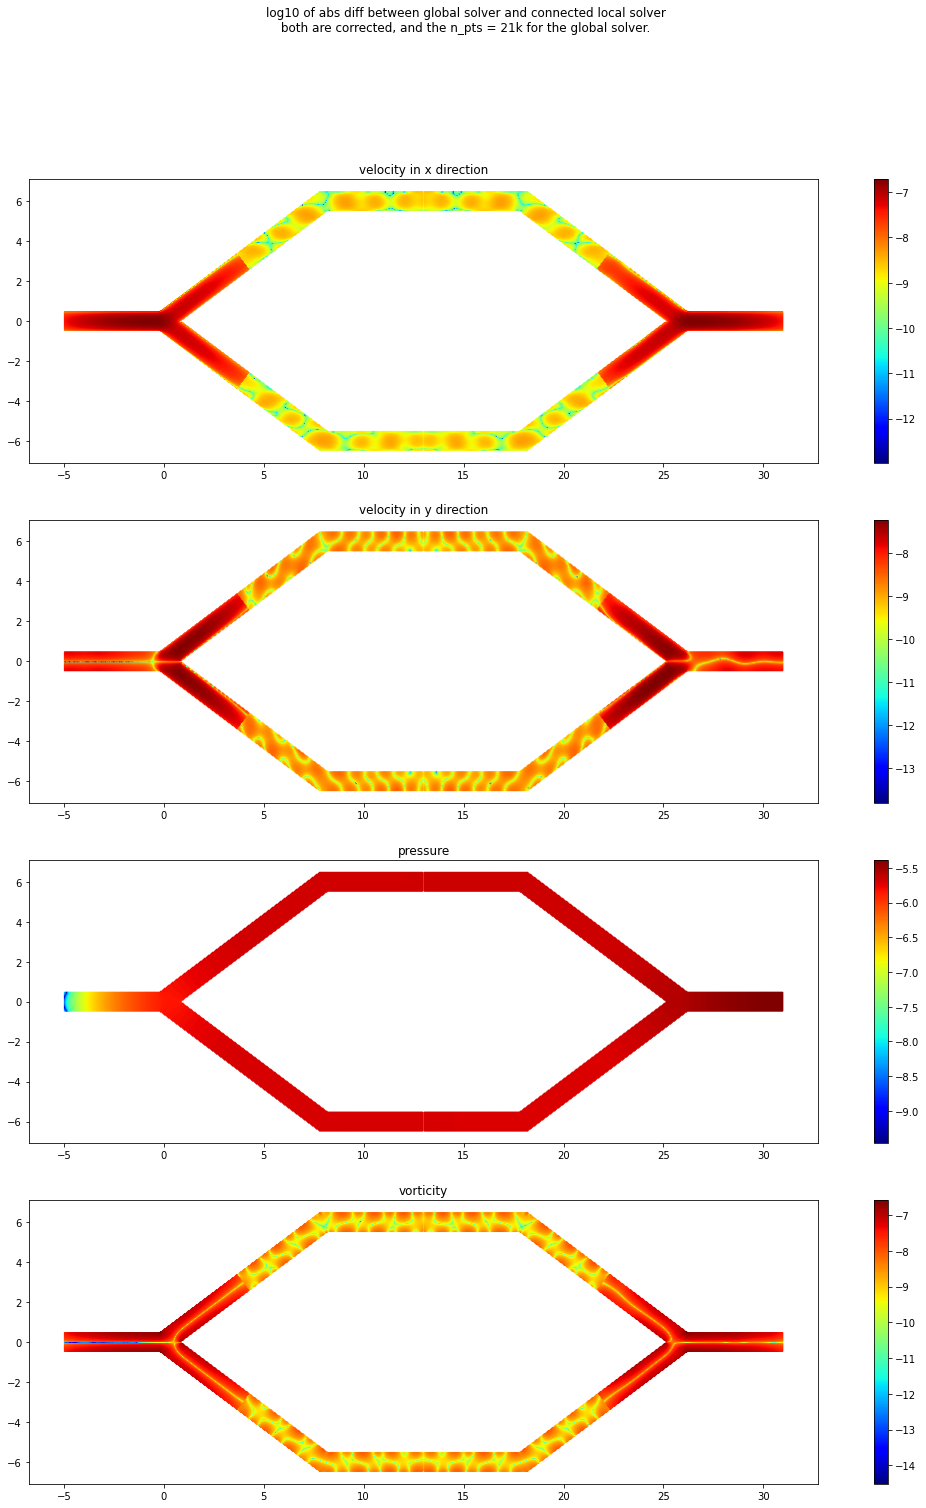

In [27]:
fig,axes = plt.subplots(4,1,figsize=(20,24))

fig.set_facecolor('white')

log_diff = list(map(lambda x: np.log10(np.abs(x)) ,[u_field-u_global,v_field-v_global,p_field-p_global,o_field-o_global]))

for ax, field, title, in zip(axes, log_diff, ['velocity in x direction','velocity in y direction','pressure','vorticity']):
    ax.set_aspect('equal')
    im = ax.scatter(xs,ys,c=field,s=1,cmap='jet')
    ax.set_title(title)
    fig.colorbar(im,ax=ax)
fig.suptitle('log10 of abs diff between global solver and connected local solver\n both are corrected, and the n_pts = 21k for the global solver. ')

Text(0.5, 1.0, 'gmres convergence for fmm')

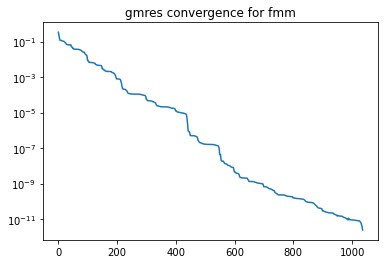

In [35]:
plt.semilogy(pipe.callbacks[-1].residuals)
plt.title('gmres convergence for fmm')